In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
mbti = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_count_vector_downsampled.csv')

In [ ]:
mbti.head()

,actually,agree,ask,away,bad,believe,best,better,bit,care,...,work,world,wouldnt,wrong,yeah,year,years,yes,youre,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = mbti.drop('y', axis=1)
y = mbti['y']

n = 5000
X_n = X[:n]
y_n = y[:n]
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]

results = []

for k in ks:
    print('Fitting KNN model with k = {:d}'.format(k))
    knn = KNeighborsClassifier(k)
    run_time = %timeit -q -o knn.fit(X_train, y_train)

    # predicting
    y_pred = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # scoring
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)
    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # save the results
    results.append([k, accuracy, precision, recall, f1, f1_test, run_time.best])

results = pd.DataFrame(results, columns=['KNN', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('KNN', inplace= True)

Fitting KNN model with k = 1
Fitting KNN model with k = 2
Fitting KNN model with k = 3
Fitting KNN model with k = 4
Fitting KNN model with k = 5
Fitting KNN model with k = 6
Fitting KNN model with k = 7
Fitting KNN model with k = 8
Fitting KNN model with k = 9
Fitting KNN model with k = 10
Fitting KNN model with k = 20
Fitting KNN model with k = 50
Fitting KNN model with k = 100


In [ ]:
results

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
KNN,,,,,,
1,0.947467,0.950117,0.983368,0.966457,0.807157,0.008300
2,0.827733,0.952342,0.817048,0.879523,0.740781,0.006230
3,0.810933,0.824441,0.958420,0.886396,0.840456,0.004714
4,0.788000,0.850251,0.879418,0.864589,0.788963,0.005088
5,0.790133,0.804644,0.960499,0.875691,0.853670,0.007794
6,0.781600,0.817902,0.921344,0.866547,0.836381,0.005056
7,0.782667,0.791116,0.975052,0.873506,0.859649,0.004592
8,0.777867,0.796591,0.955301,0.868757,0.849392,0.005210
9,0.778667,0.783508,0.984407,0.872543,0.862116,0.004581


<Axes: xlabel='KNN'>

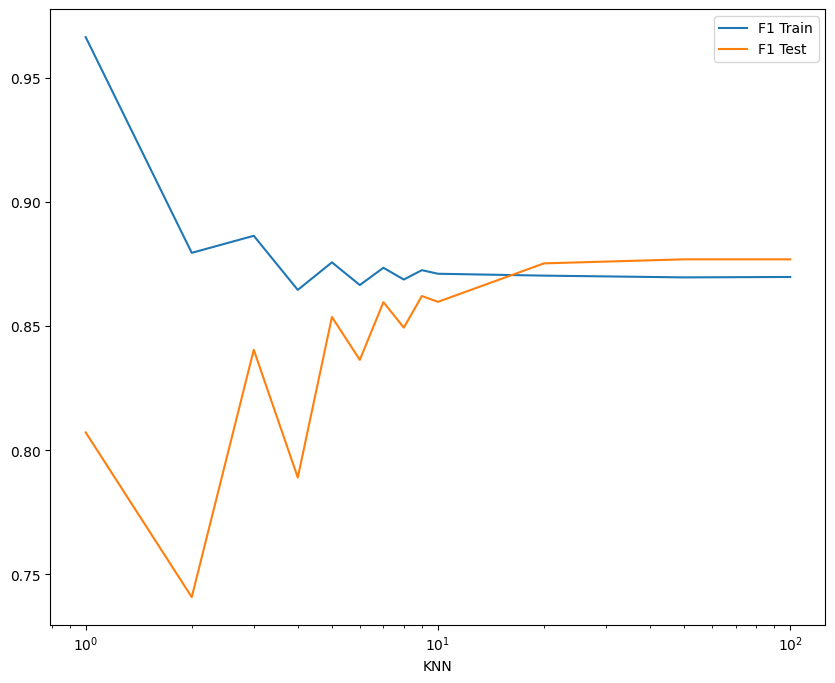

In [ ]:
results[['F1 Train', 'F1 Test']].plot(kind = 'line', figsize=(10, 8), logx=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ks is the list of k-values we created above
param_grid = {'n_neighbors': ks}

In [ ]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1')

In [ ]:
grid_knn.fit(X_n, y_n)
grid_knn.best_params_

{'n_neighbors': 50}

In [ ]:
from sklearn.svm import SVC

In [ ]:
nfolds = 2

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

param_grid = {
    'C'     : Cs,
    'gamma' : gammas
    }

grid_SVM = GridSearchCV(SVC(), param_grid, scoring='f1', cv=nfolds)
grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='f1')

In [ ]:
grid_SVM.best_params_

{'C': 1, 'gamma': 0.1}